<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bilddatensatz-vorbereiten-zum-Trainieren" data-toc-modified-id="Bilddatensatz-vorbereiten-zum-Trainieren-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bilddatensatz vorbereiten zum Trainieren</a></span></li><li><span><a href="#Bilddatensatz-vorbereiten-zum-Testen" data-toc-modified-id="Bilddatensatz-vorbereiten-zum-Testen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bilddatensatz vorbereiten zum Testen</a></span></li><li><span><a href="#Ein-CNN-aufbauen" data-toc-modified-id="Ein-CNN-aufbauen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ein CNN aufbauen</a></span></li><li><span><a href="#Funktion-zum-Trainieren-des-Modells" data-toc-modified-id="Funktion-zum-Trainieren-des-Modells-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Funktion zum Trainieren des Modells</a></span></li><li><span><a href="#Testen-des-Klassifikators" data-toc-modified-id="Testen-des-Klassifikators-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testen des Klassifikators</a></span></li></ul></div>

# Bilddatensatz vorbereiten zum Trainieren

In [1]:
import sys
sys.path.append(r"..\helferlein")

In [2]:
sys.path

['',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs\\python36.zip',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs\\DLLs',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs\\lib',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs\\lib\\site-packages',
 'C:\\Users\\Juergen Brauer\\AppData\\Local\\conda\\conda\\envs\\bvkurs\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Juergen Brauer\\.ipython',
 '..\\helferlein']

Bildgröße zum Arbeiten definieren:

In [3]:
img_size_heute = (100,100)

In [4]:
from bilddatensatz import bilddatensatz

Using TensorFlow backend.


In [5]:
train_folder = r"V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\train"
bd_train = bilddatensatz( train_folder, img_size_heute )

!!!
Unter dem Verzeichnis
	 V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\train 
habe ich folgende Unterordner/Klassen gefunden:
['bikes', 'cars']
1000 Dateien im Unterverzeicnis V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\train/bikes/
1000 Dateien im Unterverzeicnis V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\train/cars/
Insgesamt sind 2000 Bilder verfügbar
Hier die ersten 3 Einträge:
[['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\train/bikes/0001.JPEG', 0, 'bikes', array([ 1.,  0.])], ['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\train/bikes/0002.JPEG', 0, 'bikes', array([ 1.,  0.])], ['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\train/bikes/0003.JPEG', 0, 'bikes', array([ 1.,  0.])]]


# Bilddatensatz vorbereiten zum Testen

In [6]:
test_folder = r"V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\test"
bd_test = bilddatensatz( test_folder, img_size_heute )

!!!
Unter dem Verzeichnis
	 V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\test 
habe ich folgende Unterordner/Klassen gefunden:
['bikes', 'cars']
344 Dateien im Unterverzeicnis V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\test/bikes/
307 Dateien im Unterverzeicnis V:\01_job\12_datasets\01_imagenet_cars_vs_bikes\test/cars/
Insgesamt sind 651 Bilder verfügbar
Hier die ersten 3 Einträge:
[['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\test/bikes/1001.JPEG', 0, 'bikes', array([ 1.,  0.])], ['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\test/bikes/1002.JPEG', 0, 'bikes', array([ 1.,  0.])], ['V:\\01_job\\12_datasets\\01_imagenet_cars_vs_bikes\\test/bikes/1003.JPEG', 0, 'bikes', array([ 1.,  0.])]]


# Ein CNN aufbauen

Wieviele Bildklassen gibt es?

In [7]:
bd_train.nr_classes

2

In [8]:
#from keras.utils import to_categorical
#from keras.models import load_model
#from keras.layers.normalization import BatchNormalization
from keras import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import backend as K

def baue_cnn_model(shape_of_input, nr_output_neurons):
        
    # clear the last Keras session
    # this will clear the underlying TensorFlow graph
    K.clear_session()

    model = Sequential()
    
    nr_filter       = 32
    kernel_side_len = 4
    kernel_stride   = 2
    model.add(Conv2D(32,
                     kernel_size=(4,4),
                     strides=(2,2),
                     activation='relu',
                     input_shape=(img_size_heute[0],
                                  img_size_heute[1],
                                  3)
                    )
             )
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2))
             )

    model.add(Flatten())
    model.add(Dense(nr_output_neurons, activation='softmax'))
    
    model.summary()
    
    model.compile(optimizer='adam', loss='categorical_crossentropy')

    return model

input_shape = (img_size_heute[0],img_size_heute[1],3)

mein_cnn = baue_cnn_model(input_shape,
                          bd_train.nr_classes)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 36866     
Total params: 38,434
Trainable params: 38,434
Non-trainable params: 0
_________________________________________________________________


# Funktion zum Trainieren des Modells

In [9]:
schritte_insgesamt_trainiert = 0

In [10]:
import numpy as np

def trainiere_cnn(das_cnn, bildds, anz_train_schritte):
    
    height      = input_shape[0]
    width       = input_shape[1]
    nr_channels = input_shape[2]

    X = np.zeros( (1,height,width,nr_channels)      )
    Y = np.zeros( (1,bildds.nr_classes) )

    for train_schritt in range(0,anz_train_schritte):

        if train_schritt % 100 == 0:
            print("Trainingsschritt:", train_schritt)

        img, img_processed, class_id, class_name, teacher_vec = \
            bildds.hole_irgendein_bild()

        # Stecke das 3D Bild in das 4D Array
        # denn Keras will als Input für die
        # Trainingsmethod fit() ein 4D Array
        X[0,:,:,:] = img_processed

        # Der gewünschte Output ist dementsprechend
        # ein 2D Array
        Y[0,:] = teacher_vec


        # Trainiere das Modell mit diesem Bild
        das_cnn.fit(X,Y,verbose=0)        
        
    print("Training zu Ende")
    
    global schritte_insgesamt_trainiert
    schritte_insgesamt_trainiert += anz_train_schritte

In [17]:
trainiere_cnn(mein_cnn, bd_train, 3000)
print(schritte_insgesamt_trainiert)

Trainingsschritt: 0
Trainingsschritt: 100
Trainingsschritt: 200
Trainingsschritt: 300
Trainingsschritt: 400
Trainingsschritt: 500
Trainingsschritt: 600
Trainingsschritt: 700
Trainingsschritt: 800
Trainingsschritt: 900
Trainingsschritt: 1000
Trainingsschritt: 1100
Trainingsschritt: 1200
Trainingsschritt: 1300
Trainingsschritt: 1400
Trainingsschritt: 1500
Trainingsschritt: 1600
Trainingsschritt: 1700
Trainingsschritt: 1800
Trainingsschritt: 1900
Trainingsschritt: 2000
Trainingsschritt: 2100
Trainingsschritt: 2200
Trainingsschritt: 2300
Trainingsschritt: 2400
Trainingsschritt: 2500
Trainingsschritt: 2600
Trainingsschritt: 2700
Trainingsschritt: 2800
Trainingsschritt: 2900
Training zu Ende
5000


# Testen des Klassifikators

In [18]:
import matplotlib.pyplot as plt

def teste_cnn(das_cnn, bildds, zeige_bsp_klassifikationen):
    
    korrekt = 0
    
    print("Ich werde das CNN auf {} Tesbildern testen".
          format(bildds.nr_images))
    
    for test_bild_nr in range(0, bildds.nr_images):
        
        if test_bild_nr % 100 == 0:
            print("{} Bilder getestet".format(test_bild_nr))
        
        # 1. hole nächstes Testbild
        img, img_processed, class_id, class_name, teacher_vec = \
            bildds.hole_bild_per_index(test_bild_nr)
    
        
        # 2. 3D Bild in 4D Array umwandeln
        X = img_processed.reshape((-1,
                                   img_processed.shape[0],
                                   img_processed.shape[1],
                                   img_processed.shape[2] ))
        
        # 3. Klassifiziere jetzt!
        neuron_outputs = das_cnn.predict(X)
        
        # 4. Bestimme prädizierte Klasse
        predicted_class_nr = np.argmax(neuron_outputs.reshape(-1))
        
        # 5. Prädiktion korrekt?
        if predicted_class_nr == class_id:
            korrekt +=1
            
        # 6.
        # Show image, predicted class and gt class?
        if zeige_bsp_klassifikationen and np.random.randint(50)==0:
            
            predicted_class_label = \
                bildds.class_names[predicted_class_nr]
                                
            plt.title("Ist: {} vs. Prädiziert: {}\nOutputneurone: {}"
                      .format(class_name,
                              predicted_class_label,
                              neuron_outputs
                             )
                     )
            plt.imshow( img )
            plt.show()
            
        
    # Berechne Korrektklassifikationsrate
    korrekt_rate = float(korrekt) / float(bildds.nr_images)
        
    print("Korrekt klassifiziert: {} of {} images:"
          " --> rate: {:.2f}"
          .format(korrekt,
                  bildds.nr_images,
                  korrekt_rate)
         )

Ich werde das CNN auf 651 Tesbildern testen
0 Bilder getestet


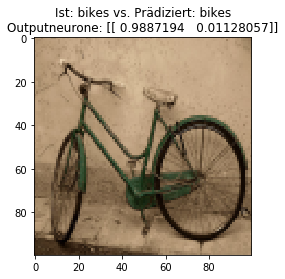

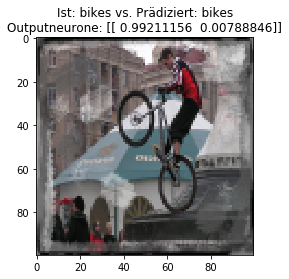

100 Bilder getestet


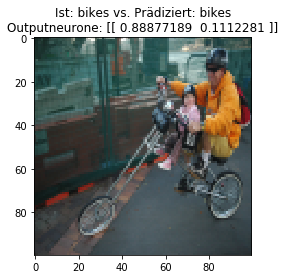

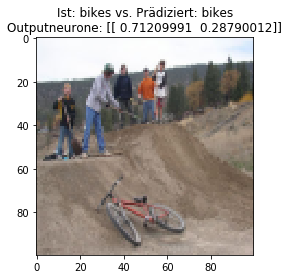

200 Bilder getestet


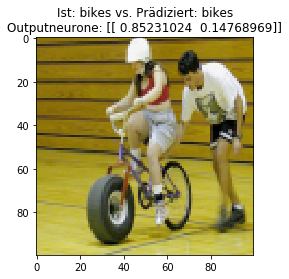

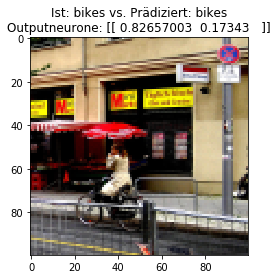

300 Bilder getestet


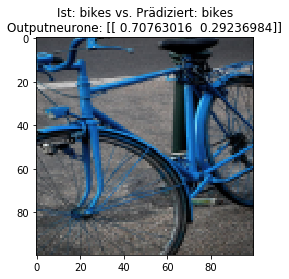

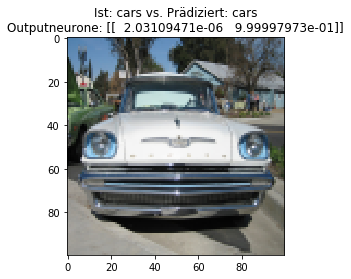

400 Bilder getestet
500 Bilder getestet


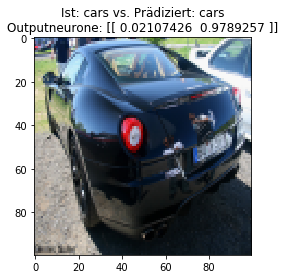

600 Bilder getestet


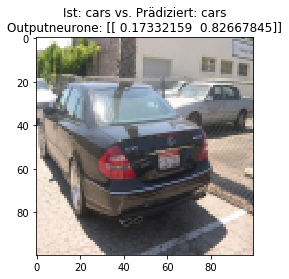

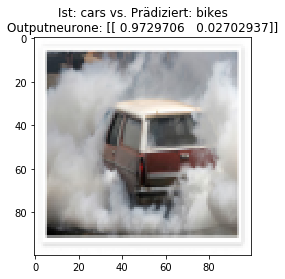

Korrekt klassifiziert: 547 of 651 images: --> rate: 0.84


In [19]:
teste_cnn(mein_cnn, bd_test, True)